In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data and Inspection

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


#### Visual Inspection

<AxesSubplot:xlabel='Price', ylabel='Avg. Area Income'>

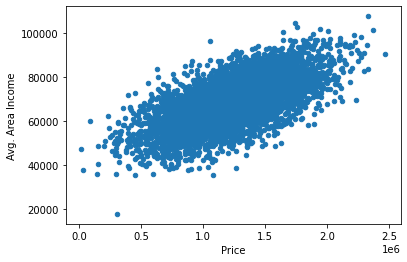

In [4]:
df.plot.scatter('Price','Avg. Area Income')

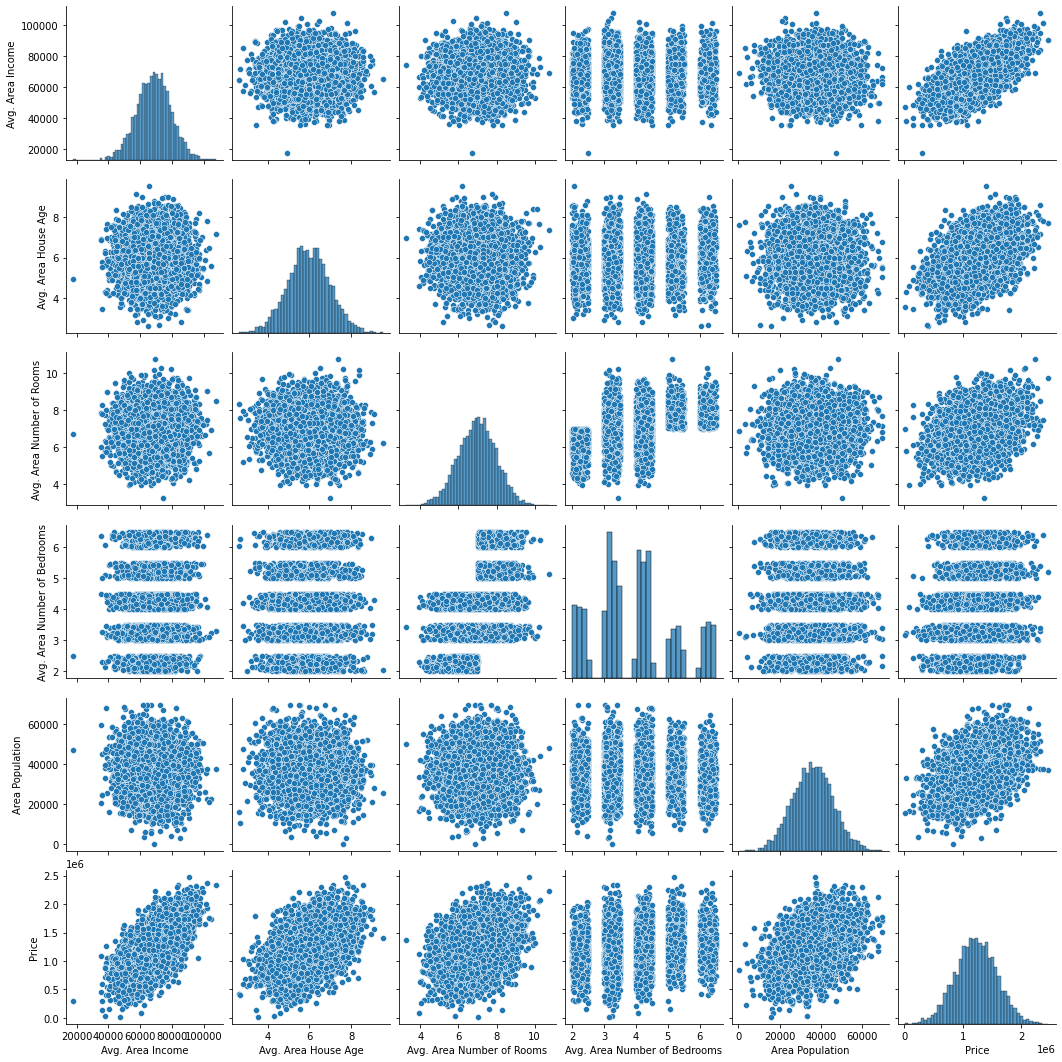

In [5]:
sns.pairplot(df)

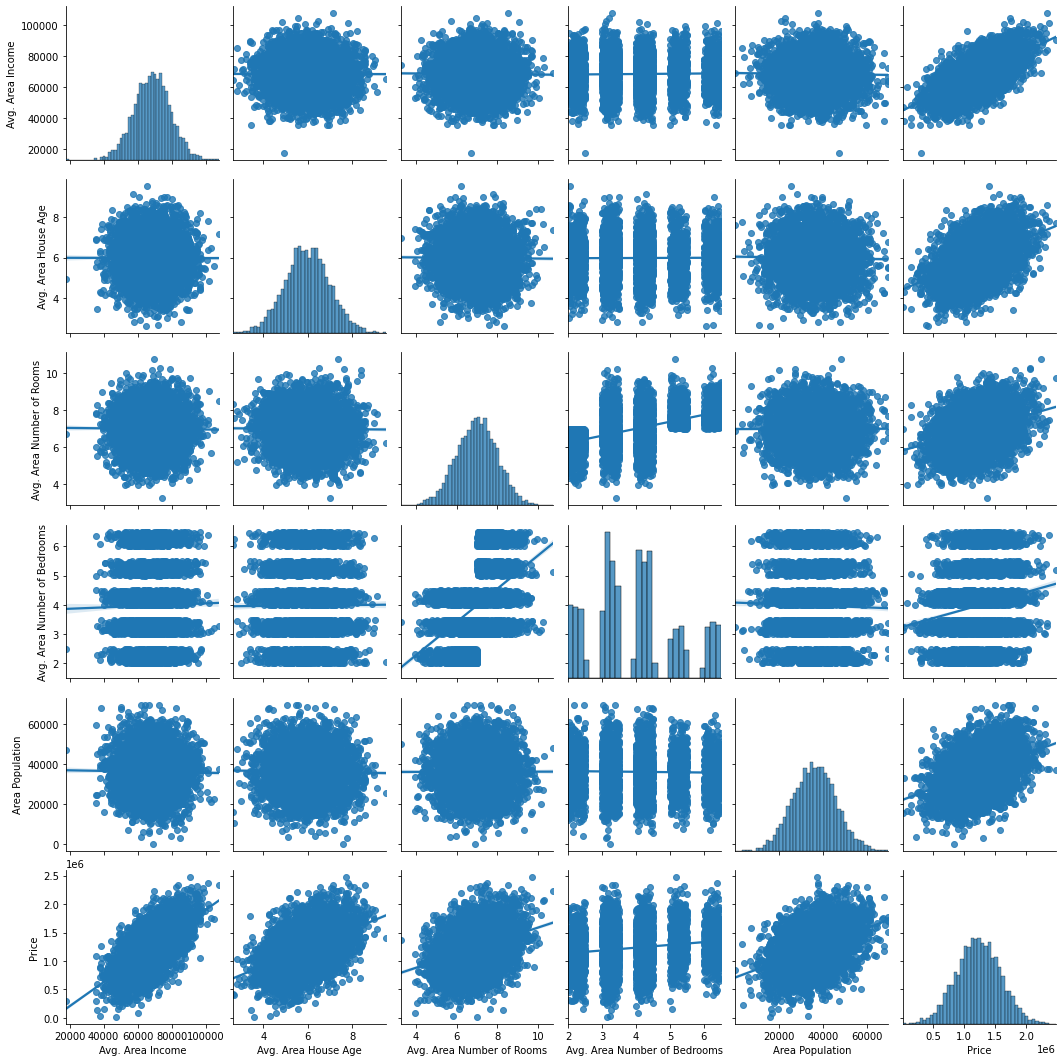

In [6]:
sns.pairplot(df,kind = 'reg')

In [7]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

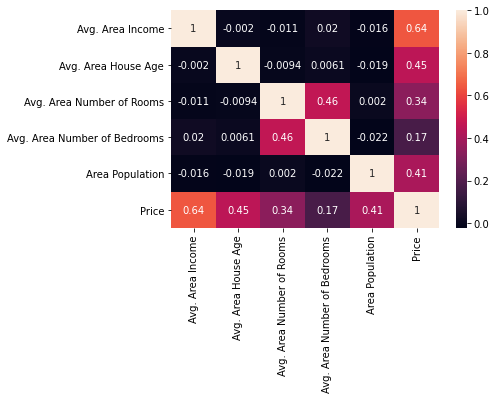

In [8]:
sns.heatmap(df.corr(),annot = True)

### Feature Selection

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
# Feature Matrix
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Area Population']]

# label = Matrix
y = df['Price']

## Data Spliting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,
                                                random_state=101)

In [13]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 3430 to 4959
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [14]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1718 to 3063
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [15]:
ytrain

3430    9.958132e+05
3979    8.735092e+05
2153    1.360502e+06
4764    1.742351e+06
36      1.233220e+06
            ...     
4171    7.296417e+05
599     1.599479e+06
1361    1.102641e+06
1547    8.650995e+05
4959    2.108376e+06
Name: Price, Length: 3750, dtype: float64

In [16]:
ytrain.shape

(3750,)

## Linear Regression Modelling

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression().fit(xtrain,ytrain)

In [19]:
model

LinearRegression()

In [20]:
model.coef_

array([2.16411925e+01, 1.64948656e+05, 1.22327933e+05, 1.52429772e+01])

In [21]:
model.intercept_

-2643495.581909568

In [22]:
coef = pd.DataFrame(model.coef_,columns = ['Coeff'],index = x.columns)
coef

,Coeff
Avg. Area Income,21.641192
Avg. Area House Age,164948.655552
Avg. Area Number of Rooms,122327.933150
Area Population,15.242977


let income = 100
age = 2
num of rooms = 3
area_pop = 2000
y = 100 * 21.64 + 2 * 164948.65 + 3 * 122328 + 2000 * 15


## Model Evalution

In [23]:
model.score(xtest,ytest)

0.9170576659270545

In [24]:
round(100*model.score(xtest,ytest),2)

91.71

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
ypred = model.predict(xtest)

In [27]:
xtest.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
1718,66774.995817,5.717143,7.795215,36788.980327
2511,62184.539375,4.925758,7.427689,26008.309124
345,73643.057298,6.766853,8.337085,43152.139577
2521,61909.041438,6.228343,6.593138,28953.925377
54,72942.705059,4.786222,7.319886,24377.909049


In [28]:
ypred[:5]

array([1258976.14439243,  819807.04069244, 1744036.82861755,
        971515.59800996,  991570.84896598])

In [29]:
ytest[:5].values

array([1251688.61570287,  873048.31964236, 1696977.6628326 ,
       1063964.28787395,  948788.27570945])

In [30]:
mean_absolute_error(ytest,ypred)

81836.17794531878

In [31]:
mean_squared_error(ytest,ypred)

10365378638.970638

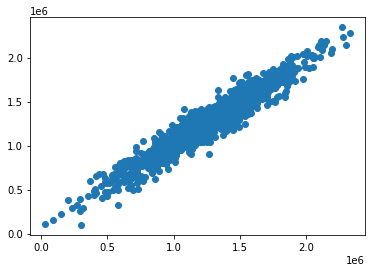

In [32]:
plt.scatter(ytest,ypred)

## Model Deployment

In [33]:
pd.to_pickle(model,'house_price_predictor.pkl')